<H1 style="text-align: center">EEEM079 - Fundamentals of Machine Learning</H1>
<H1 style="text-align: center">Week 4: Classification</H1>

> Dr. Xiatian (Eddy) Zhu, Dr Syed Sameed Husain

> xiatian.zhu@surrey.ac.uk, sameed.husain@surrey.ac.uk


**Introduction**

Classification, along with regression (predicting a number, covered above) is one of the most common types of machine learning problems.

This lab will help you understand a classification problem in PyTorch.

Happy Programming!⚡⚡

<!-- Here we will introduce a classification problem in PyTorch and solve it using the same methodology we followed earlier. However, here we will be using a logistic regression model. This problem involves using a synthetic data from `scikit-learn`. -->

### Sources:
* This notebook used (and modified) code from the following repos and sources:
    * https://github.com/jonkrohn/ML-foundations
    * https://pytorch.org/tutorials/beginner/nlp/deep_learning_tutorial.html
    * https://scikit-learn.org/stable/api/sklearn.datasets.html
    * https://datascience.stackexchange.com/a/31045
    * https://colah.github.io/posts/2015-09-Visual-Information/

# Contents

*   [1. Basic Classification Process](https://colab.research.google.com/drive/1SnaLrn8g4r0TDFkwVdjboXQQzgDrWd_n#scrollTo=KRXqu8QeW_NW)
*   [2. Putting things together by building a multi-class PyTorch model](https://colab.research.google.com/drive/1SnaLrn8g4r0TDFkwVdjboXQQzgDrWd_n#scrollTo=yLEIpnrpyyPh)
*   [3. Question](https://colab.research.google.com/drive/1SnaLrn8g4r0TDFkwVdjboXQQzgDrWd_n#scrollTo=OLJMyDGZyyPk)
*   [Exercises](https://colab.research.google.com/drive/1SnaLrn8g4r0TDFkwVdjboXQQzgDrWd_n#scrollTo=zNoTOYSTyyPk)
*   [Extra-curriculum](https://colab.research.google.com/drive/1SnaLrn8g4r0TDFkwVdjboXQQzgDrWd_n#scrollTo=2uMGgtNyyyPk)



<!-- *   Basic Classification Process
*   Putting things together by building a multi-class PyTorch model
*   More classification evaluation metrics
*   A Question
*   Exercises
*   Extra-curriculum -->

## 1. Basic Classification Process

### 1.1 Import the synthetic data

We'll use the [`make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) method from Scikit-Learn to generate two classes with different coloured dots.

In [1]:
from sklearn.datasets import make_blobs

# Make 1000 samples
n_samples = 1000

# Create data with two classes
X, y = make_blobs(n_samples=1000,
    n_features=2, # X features
    centers=2, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=42 # Determines random number generation for dataset creation.
)

Now let's view the first 5 `X` and `y` values.

In [2]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[-1.25565945  7.31972585]
 [ 7.15643006  1.14278732]
 [ 2.99546621 -0.18690664]
 [ 5.42413207  1.11261968]
 [ 4.36915897  6.76283104]]

First 5 y labels:
[0 1 1 1 1]


Note that therea are two `X` values per one `y` value.

The [Pandas](https://pandas.pydata.org/docs/) is quite useful here. We are going to put `X` and `y`into a pandas DataFrame. Out Exploratory Data Analysis (EPA) will be smoother.

In [3]:
import pandas as pd
df = pd.DataFrame(X, columns=['X1', 'X2'])
df['Label'] = y

# View the first few rows of the dataset
df.head(10)

,X1,X2,Label
0,-1.255659,7.319726,0
1,7.156430,1.142787,1
2,2.995466,-0.186907,1
3,5.424132,1.112620,1
4,4.369159,6.762831,1
5,6.102675,2.724811,1
6,5.519920,1.260814,1
7,-2.214416,10.077792,0
8,3.182394,-0.096258,1
9,-2.558888,11.706123,0


It looks like each pair of `X` features (`X1` and `X2`) has a label (`y`) value of either 0 or 1.

This tells us that our problem is **binary classification** since there's only two options (0 or 1).

How many values of each class is there?
What do you think the binary choices are?

In [4]:
# Check different labels
df.Label.value_counts()

,count
Label,
0,500
1,500


Our data is evenly split and balanced between the two labels!

Let's visualise the data we created!

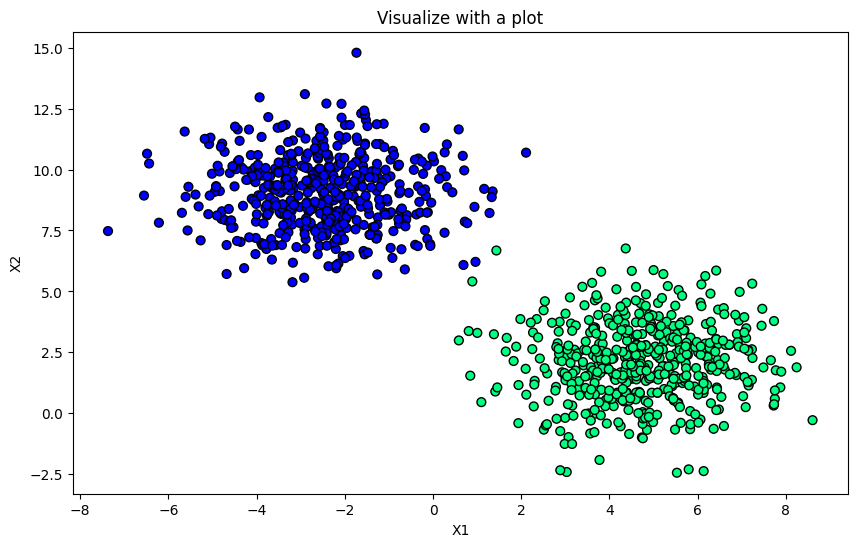

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0],
            X[:, 1],
            c=y,
            s=40,
            cmap=plt.cm.winter,
            edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Visualize with a plot')
plt.show()


Let's find out how we could build a PyTorch Logistic regression to classify dots into blue (0) or green (1).

> **Note:** This dataset is often what's considered a **toy problem** (a problem that's used to try and test things out on) in machine learning.
>
> But it represents the major key of classification, you have some kind of data represented as numerical values and you'd like to build a model that's able to classify it, in our case, separate it into blue or green dots.

### 1.2 Input and output shapes

One of the most common errors in deep learning is shape errors. Mismatching the shapes of tensors and tensor operations will result in errors in your models.

And there's no surefire way to making sure they won't happen, they will. What you can do instead is continaully familiarise yourself with the shape of the data you're working with throughout the pipeline.

Ask yourself:

"What shapes are my inputs and what shapes are my outputs? What are the mathematical operations taking place between input and output that affect the dimensions of the data?"

From this, what do you expect the output shape of the model we're going to build will be?

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

Here, the data has 1000 points (each of two features) and corresponding 1000 labels.
Why do you think `X` has two features? Let's examine this!

In [7]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [-1.25565945  7.31972585] and the same for y: 0
Shapes for one sample of X: (2,) and the same for y: ()


Have you figured out why X has two features?

### 1.3 Turn data into tensors and split the data

In order for PyTorch to be able to process our data we first need to convert it into PyTroch Tensors. Currently, the data is in NumPy arrays.
Following that we will split `X` into `X_train` and `X_test` and split `y` similarly.



In [8]:
# Current X and y type
X_sample.dtype, y_sample.dtype

(dtype('float64'), dtype('int64'))

Note that default data type in NumPy is float64. While in PyTorch (as we'll see below), the default data type is float32. Bear this in mind as this may cause issues. For now, PyTorch will convert float64 to float32 using the `.type()` method.

In [9]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.int)

# View the first five samples
X[:5], y[:5], X.dtype, y.dtype

(tensor([[-1.2557,  7.3197],
         [ 7.1564,  1.1428],
         [ 2.9955, -0.1869],
         [ 5.4241,  1.1126],
         [ 4.3692,  6.7628]]),
 tensor([0, 1, 1, 1, 1], dtype=torch.int32),
 torch.float32,
 torch.int32)

##### Now that the data is in the correct format we will split it into a training dataset (80% of the data) and testing dataset (20% of the data). We will use `Scikit-Learn`'s [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) built in function. Note that `test_size=0.2` is what tells the model we're interested in 80/20 split.

In [10]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### 1.4 Building the model
1. First, we will setup our code so that it's device agnostic (the can run on GPU or a CPU if a GPU is not available).
2. We will build the architecture of the model by inheriting from `nn.Module`. For more information about Object Oriented Programming please see: https://realpython.com/python3-object-oriented-programming/.
3. We define the loss function and the optimizer.
4. We build the training/testing loop in a manner similar to what we did earlier with linear regression.

In [11]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code. In PyTorch, 'cuda' means gpu....don't ask.
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Excellent, now `device` is setup, we can use it for any data or models we create and PyTorch will handle it on the CPU (default) or GPU if it's available.

Note that our model must be capable of handling our `X` data as inputs and producing something in the shape of our `y` data as ouputs. In other words, given `X` (features) we want our model to predict `y` (label).

This is a **Supervided Learning** set up; our data contain both features and labels!

#### 1.4.1 Moving Data to the Device

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

X_train[0:5], y_train[0:5]

(tensor([[-3.3258,  9.1807],
         [ 6.5854,  1.9389],
         [ 3.3869,  5.1909],
         [ 0.7067,  9.9652],
         [ 5.2546,  1.6113]]),
 tensor([0, 1, 1, 0, 1], dtype=torch.int32))

#### 1.4.2 Define Logistic Regression Model

Let's create a model class that:
1. Subclasses `nn.Module` (almost all PyTorch models are subclasses of `nn.Module`).
2. Use [`nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html) to create the model parameters.
3. Defines a `forward()` method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target `device`.

In [13]:
class LogisticRegression(nn.Module):
    def __init__(self, input_feature):
        super(LogisticRegression, self).__init__()
        self.weights = nn.Parameter(torch.randn(input_feature, 1, dtype=torch.float32, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        logits = torch.matmul(x, self.weights) + self.bias
        y_pred_probs = torch.sigmoid(logits)
        return y_pred_probs

input_feature = X_train.shape[1]
model_0 = LogisticRegression(input_feature)
model_0.to(device)

LogisticRegression()

##### Let's analyze the forward function

```python
logits = torch.matmul(x, self.weights) + self.bias
```

it internally solve the following equation:

$$
\mathbf{y} = x \cdot \mathbf{Weights}^T  + \mathbf{bias}
$$

The *raw outputs* (unmodified) of this equation ($\mathbf{y}$) and in turn, the raw outputs of our model are often referred to as [**logits**](https://datascience.stackexchange.com/a/31045).

```python
y_pred = torch.sigmoid(logits)
```

This is an important disctinction to make here since classification models will add a final layer to interpret these numbers. The layer used in binary classification models is a `Sigmoid` activation function. It transforms the difficult to interpret logits to probabilities! This makes comparison with ground truth labels much easier.  

The sigmoid function formula goes like so:

$$ S(y) = \frac{1}{1+e^{-y}} $$


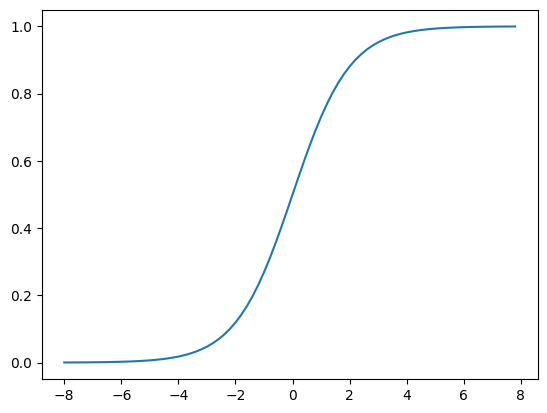

In [14]:
import numpy as np

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

x = np.arange(-8, 8, 0.2)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

We can analyze from the figure above that this value is assigned to a value close to 0 or 1 by the `sigmoid` function, which is conducive to our binary classification.

In [15]:
model_0.eval()
y_pred_probs = model_0(X_test.to(device))[:5].squeeze()

y_pred_probs

tensor([0.9914, 0.0952, 0.8558, 0.9918, 0.0510], grad_fn=<SqueezeBackward0>)

Okay, it seems like the outputs now have some kind of consistency (Remember, that we are dealing with the untrained randomly initialised model). And it bears repeating that this means the values of the parameters (weights and biases) are initialised randomly.

The outputs are now in the form of **prediction probabilities** (referred to in this notebook as `y_pred_probs`), in other words, the values are now how much the model thinks the data point belongs to one class or another.

In our case, since we're dealing with binary classification, our ideal outputs are 0 or 1. So these values can be viewed as a decision boundary.

The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

More specificially:
* If `y_pred_probs` >= 0.5, `y=1` (class 1)
* If `y_pred_probs` < 0.5, `y=0` (class 0)

To turn our prediction probabilities in prediction labels, we simply round the prediction probabilities of the sigmoid activation function.

In [16]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

y_preds

tensor([1., 0., 1., 1., 0.], grad_fn=<RoundBackward0>)

Excellent! Now it looks like our model's predictions are in the same form as our truth labels (`y_test`).

In [17]:
y_test[:5]

tensor([1, 0, 1, 1, 0], dtype=torch.int32)

This means we'll be able to compare our models predictions to the test labels to see how well the model is learning.

To recap, we converted our model's raw outputs (logits) to predicition probabilities using a sigmoid activation function.

And then converted the prediction probabilities to prediction labels by rounding them. Essentially saying: anyhing over 0.5 round up to 1, otherwise round down to 0.

#### 1.4.3 Define Plot Decision Boundary Function

In [18]:
import numpy as np

# Visualisation of decision boundary functions
def plot_decision_boundary(X, y, model, title):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(y_logits)  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.winter, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)

Plot decision boundaries for training and test sets before training!

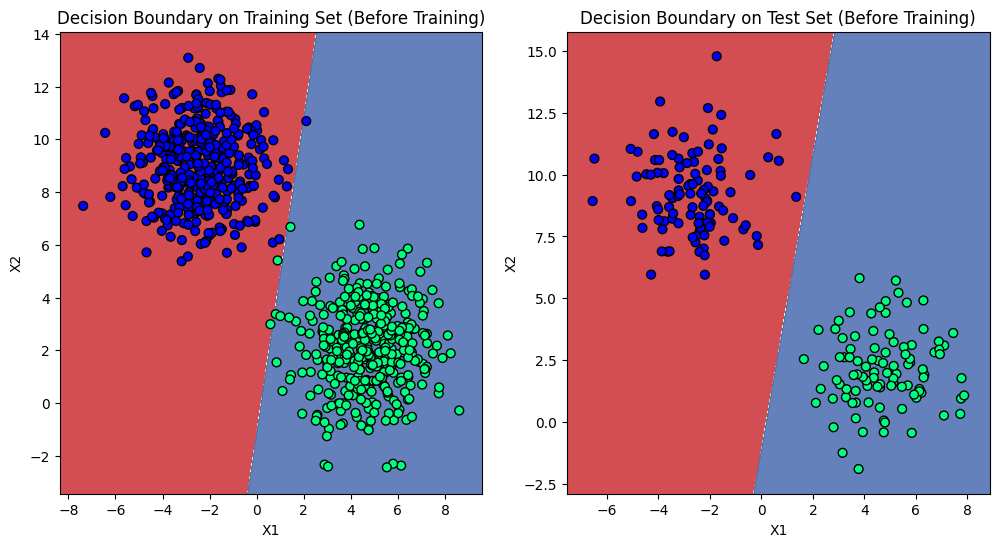

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_train, y_train, model_0, "Decision Boundary on Training Set (Before Training)")
plt.subplot(1, 2, 2)
plot_decision_boundary(X_test, y_test, model_0, "Decision Boundary on Test Set (Before Training)")

**Note** that the output shape of the untrained model is not exactly the same as the y_test! These two vectors cannot be compared (for calculating the loss)
We will fix that in when we build the training/testing loop. But first, let's set up the loss function anf the optimizer.

The process is identical to what you encountered earlier in this notebook. However, while the earlier examples were of a linear regression problem (predicting a number), here this is a classification problem we're interested in prediction a label (a discrete value indicative of whether an observation belongs to a class or not). A consequence of this is that we can't use MAE to calculate the loss. However, we will be using [Bianry Cross Entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a). For a deeper dive check this excellent [post](https://colah.github.io/posts/2015-09-Visual-Information/).

We will use the same optimizer we used above, the stochastic gradient descent optimizer (SGD, `torch.optim.SGD()`).
Below is a table that lists the most common loss functions and optimizers and their functions in PyTorch:



| Loss function/Optimizer | Problem type | PyTorch Code |
| ----- | ----- | ----- |
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimizer | Classification, regression, many others. | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| Binary cross entropy loss | Binary classification | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) or [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Cross entropy loss | Multi-class classification | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Mean absolute error (MAE) or L1 Loss | Regression | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) |
| Mean squared error (MSE) or L2 Loss | Regression | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss). |  



PyTorch has two binary cross entropy implementations:

> 1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) - This is the same as above except it has a sigmoid layer ([`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)) built-in (we'll see what this means soon).

Which one should you use?

The [documentation for `torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) states that it's more numerically stable than using `torch.nn.BCELoss()` after a `nn.Sigmoid` layer. Briefly, we tend to use a final `nn.Sigmoid` for a binary classification problem (two choice, e.g. dogs vs cats) and `nn.SoftMax` for multi classification problems (e.g. predict what number is in the image). For more information on the `nn.Sigmoid` feel free to explore [this](https://machinelearningmastery.com/a-gentle-introduction-to-sigmoid-function/)

So generally, implementation of 2 is a better option. However for advanced usage, you may want to separate the combination of `nn.Sigmoid` and `torch.nn.BCELoss()` but that is beyond the scope of this notebook.

Knowing this, let's create a loss function and an optimizer.

> **Note:** There's a [discussion on the PyTorch forums about the use of `nn.BCELoss` vs. `nn.BCEWithLogitsLoss`](https://discuss.pytorch.org/t/bceloss-vs-bcewithlogitsloss/33586/4). It can be confusing at first but as with many things, it becomes easier with practice.

#### 1.4.4 Create the Loss Function and the Optimizer

We can define a loss function ourselves, or we can use a packaged loss function.

> **Note**  The use of the sigmoid activation function is not required when passing our model's raw outputs to the `nn.BCEWithLogitsLoss` (the "logits" in logits loss is because it works on the model's raw logits output), this is because it has a sigmoid function built-in.

We used the sigmoid function in the definition model, so we use `nn.BCELoss`(no sigmoid built-in)

In [20]:
# Custom logistic regression likelihood function as loss function
def custom_loss(y_pred, y_true):
    loss = -torch.mean(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))
    return loss

loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
# loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

Now let's also create an **evaluation metric**.

An evaluation metric can be used to offer another perspective on how your model is going. If a loss function measures how *wrong* your model is, think of evaluation metrics as measuring how *right* it is.

After all, when evaluating your models it's good to look at things from multiple points of view. There are several evaluation metrics that can be used for classification problems but let's start out with **accuracy**.

Accuracy can be measured by dividing the total number of correct predictions over the total number of predictions. For example, a model that makes 99 correct predictions out of 100 will have an accuracy of 99%.

Let's write a function to do so.



In [21]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

### 1.5 Training the model


Recall that the model training steps in PyTorch are:

<details>
    <summary>PyTorch training loop steps</summary>
    <ol>
        <li><b>Forward pass</b> - The model goes through all of the training data once, performing its
            <code>forward()</code> function
            calculations (<code>model(x_train)</code>).
        </li>
        <li><b>Calculate the loss</b> - The model's outputs (predictions) are compared to the ground truth and evaluated
            to see how
            wrong they are (<code>loss = loss_fn(y_pred, y_train</code>).</li>
        <li><b>Zero gradients</b> - The optimizers gradients are set to zero (they are accumulated by default) so they
            can be
            recalculated for the specific training step (<code>optimizer.zero_grad()</code>).</li>
        <li><b>Perform backpropagation on the loss</b> - Computes the gradient of the loss with respect for every model
            parameter to
            be updated (each parameter
            with <code>requires_grad=True</code>). This is known as <b>backpropagation</b>, hence "backwards"
            (<code>loss.backward()</code>).</li>
        <li><b>Step the optimizer (gradient descent)</b> - Update the parameters with <code>requires_grad=True</code>
            with respect to the loss
            gradients in order to improve them (<code>optimizer.step()</code>).</li>
    </ol>
</details>



#### 1.5.1 Building a training loop

We have now discussed how to take our raw model outputs (the logits) and convert them to prediction labels, now let's build a training loop.

Let's start by training for 100 epochs and outputing the model's progress every 10 epochs.

In [22]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
model_0.to(device)
losses = []

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_pred_probs = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred= torch.round(y_pred_probs) # turn pred probs -> pred labls.

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_pred_probs, # Using nn.BCELoss works with raw logits
                   y_train.float())
    losses.append(loss) # Save losses for visualizing training losses
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)


    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_pred = model_0(X_test).squeeze()
        test_pred_labels = torch.round(test_pred)
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_pred,
                            y_test.float())
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred_labels)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.09817, Accuracy: 99.62% | Test loss: 0.08435, Test acc: 100.00%
Epoch: 10 | Loss: 0.08773, Accuracy: 99.50% | Test loss: 0.07511, Test acc: 100.00%
Epoch: 20 | Loss: 0.08060, Accuracy: 99.50% | Test loss: 0.06871, Test acc: 100.00%
Epoch: 30 | Loss: 0.07526, Accuracy: 99.50% | Test loss: 0.06384, Test acc: 100.00%
Epoch: 40 | Loss: 0.07099, Accuracy: 99.50% | Test loss: 0.05992, Test acc: 100.00%
Epoch: 50 | Loss: 0.06744, Accuracy: 99.38% | Test loss: 0.05664, Test acc: 100.00%
Epoch: 60 | Loss: 0.06441, Accuracy: 99.38% | Test loss: 0.05381, Test acc: 100.00%
Epoch: 70 | Loss: 0.06177, Accuracy: 99.38% | Test loss: 0.05134, Test acc: 100.00%
Epoch: 80 | Loss: 0.05943, Accuracy: 99.38% | Test loss: 0.04913, Test acc: 100.00%
Epoch: 90 | Loss: 0.05734, Accuracy: 99.38% | Test loss: 0.04715, Test acc: 100.00%


#### 1.5.2 Visualising losses during training

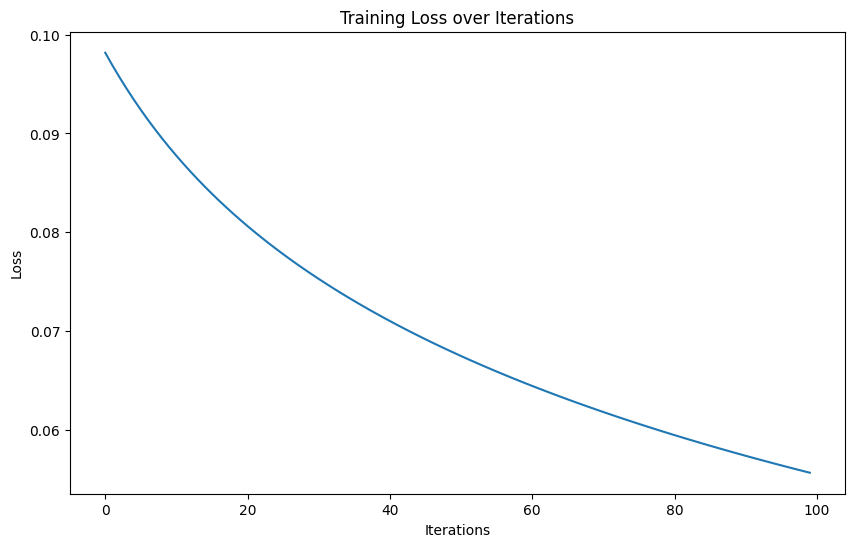

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(torch.tensor(losses))
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.show()

### 1.6 Make predictions and evaluate the model

From the metrics it looks like our model is random guessing. How could we investigate this further?

Let's make a plot of our model's predictions, the data it's trying to predict on and the decision boundary it's creating for whether something is class 0 or class 1.


In [24]:
# evaluate the model
model_0.eval()
with torch.no_grad():
    y_pred_probs = model_0(X_test)
    y_pred = torch.round(y_pred_probs).squeeze()
    accuracy = accuracy_fn(y_true=y_test, y_pred=y_pred)
    print(f"Accuracy on test set: {(accuracy):.2f}%")

Accuracy on test set: 100.00%


Plot decision boundaries for training and test sets after training

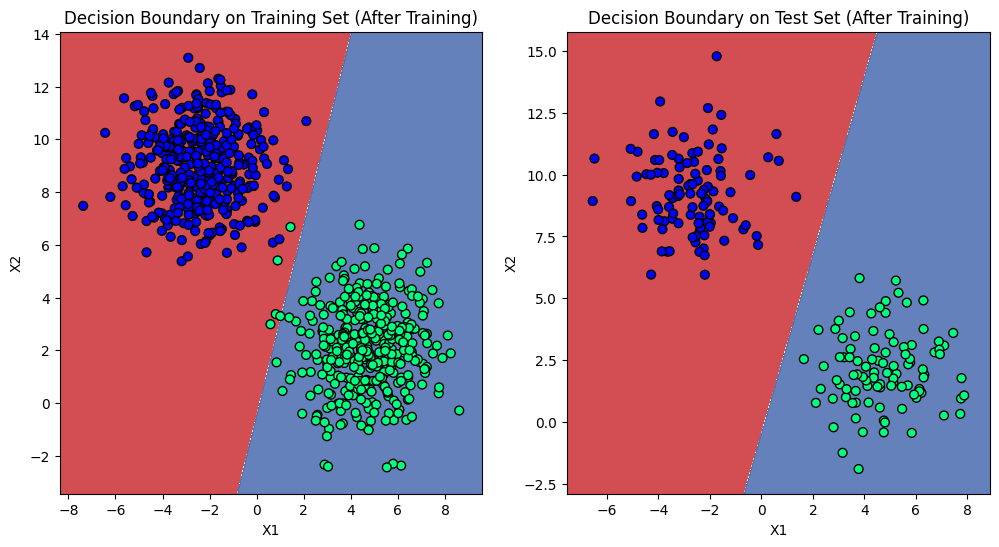

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_train, y_train, model_0, "Decision Boundary on Training Set (After Training)")
plt.subplot(1, 2, 2)
plot_decision_boundary(X_test, y_test, model_0, "Decision Boundary on Test Set (After Training)")

## 2. Putting things together by building a multi-class PyTorch model

We've covered a fair bit.

But now let's put it all together using a multi-class classification problem.

Recall a **binary classification** problem deals with classifying something as one of two options (e.g. a photo as a cat photo or a dog photo) where as a **multi-class classification** problem deals with classifying something from a list of *more than* two options (e.g. classifying a photo as a cat a dog or a chicken).



### 2.1 Creating multi-class classification data

To begin a multi-class classification problem, let's create synthetic multi-class data.

To do so, we can leverage Scikit-Learn's [`make_blobs()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) method.

This method will create however many classes (using the `centers` parameter) we want.

Specifically, let's do the following:

1. Create some multi-class data with `make_blobs()`.
2. Turn the data into tensors (the default of `make_blobs()` is to use NumPy arrays).
3. Split the data into training and test sets using `train_test_split()`.
4. Visualize the data.

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


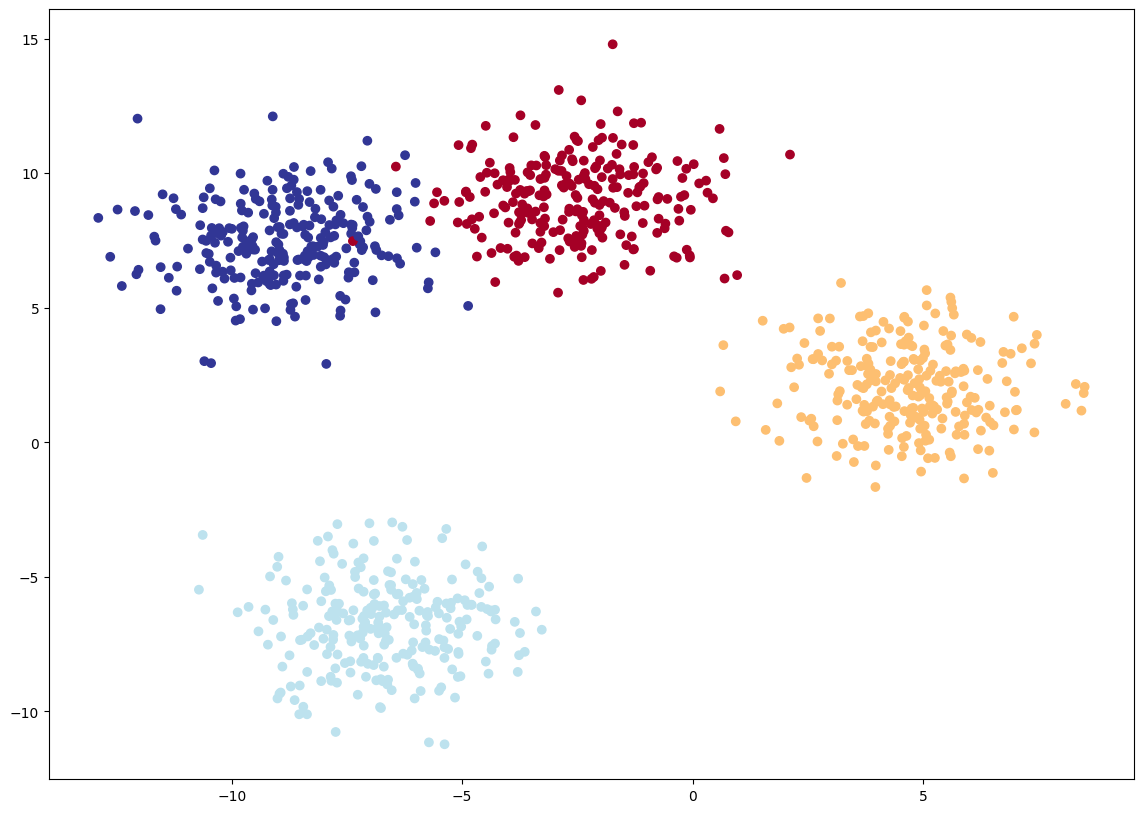

In [26]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(14, 10))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

Let's build a model to separate the coloured blobs.

> **Question:** Does this dataset need non-linearity? Or could you draw a succession of straight lines to separate it?

### 2.2 Building a multi-class classification model in PyTorch

We've created a few models in PyTorch so far.

You might also be starting to get an idea of how flexible neural networks are.

How about we build one similar to `model_0` but this still capable of handling multi-class data?

To do so, let's create a subclass of `nn.Module` that takes in three hyperparameters:
* `input_features` - the number of `X` features coming into the model.
* `output_features` - the ideal numbers of output features we'd like (this will be equivalent to `NUM_CLASSES` or the number of classes in your multi-class classification problem).

Since we're putting things together, let's setup some device agnostic code (we don't have to do this again in the same notebook, it's only a reminder).

Then we'll create the model class using the hyperparameters above.

In [27]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [28]:
# Build model
class MultiClassModel(nn.Module):
    def __init__(self, input_feature, out_feature):
        super(MultiClassModel, self).__init__()
        self.weights = nn.Parameter(torch.randn(input_feature, out_feature, dtype=torch.float32, requires_grad=True))
        self.bias = nn.Parameter(torch.zeros(out_feature, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        outputs = torch.matmul(x, self.weights) + self.bias
        return outputs

# Create an instance of BlobModel and send it to the target device
model_1 = MultiClassModel(input_feature=NUM_FEATURES,
                    out_feature=NUM_CLASSES).to(device)
model_1

MultiClassModel()

Excellent! Our multi-class model is ready to go, let's create a loss function and optimizer for it.

### 2.3 Creating a loss function and optimizer for a multi-class PyTorch model

> Note: Since we're working on a multi-class classification problem, we'll use the `nn.CrossEntropyLoss()` method as our loss function.

And we'll stick with using SGD with a learning rate of 0.1 for optimizing our `model_1` parameters.


In [29]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

### 2.4 Getting prediction probabilities for a multi-class PyTorch model

Alright, we've got a loss function and optimizer ready, and we're ready to train our model but before we do let's do a single forward pass with our model to see if it works.

In [30]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_1.eval()      # Note that setting the model to eval mode is not, strictly speaking here, necessary since the model is still at its inital state!
model_1(X_blob_train.to(device))[:5]

tensor([[ -2.0169,   0.0330,   8.4857,  -0.9493],
        [-11.5801,  -2.1131,  20.4199,  -6.6822],
        [  7.2809,   0.5865, -21.9611,   3.8042],
        [  2.9537,   0.0506, -11.2118,   1.4431],
        [ -9.2286,  -1.7750,  15.1546,  -5.3740]], grad_fn=<SliceBackward0>)



It looks like we get one value per feature of each sample.

Let's check the shape to confirm.



It looks like we get one value per feature of each sample.

Let's check the shape to confirm.

In [31]:
# How many elements in a single prediction sample?
model_1(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

Wonderful, our model is predicting one value for each class that we have. In other words, the model will have 4 outputs, one for each class!

Do you remember what the raw outputs of our model are called?

If you guessed *logits*, you'd be correct. So right now our model is producing raw logits, which are not very meaningful, but what if we wanted to figure out exactly which label it was the test sample(s)?

As in, how do we go from `logits -> prediction probabilities -> prediction labels` just like we did with the binary classification problem?

That's where the [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) comes into play.

The softmax function calculates the probability of each prediction class being the actual predicted class compared to all other possible classes.

If this doesn't make sense, let's see in code.

In [32]:
# Make prediction logits with model
y_logits = model_1(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ -3.4677,  -0.2350,  11.0044,  -1.7881],
        [-10.4181,  -2.3121,  13.3181,  -6.2316],
        [  6.7080,   0.6551, -18.8226,   3.5663],
        [ -0.0811,   0.2552,   3.4619,   0.0977],
        [-11.4616,  -1.9122,  22.4144,  -6.5179]], grad_fn=<SliceBackward0>)
tensor([[5.1863e-07, 1.3146e-05, 9.9998e-01, 2.7815e-06],
        [4.9147e-11, 1.6289e-07, 1.0000e+00, 3.2336e-09],
        [9.5642e-01, 2.2485e-03, 7.8136e-12, 4.1327e-02],
        [2.6200e-02, 3.6675e-02, 9.0580e-01, 3.1329e-02],
        [1.9401e-15, 2.7232e-11, 1.0000e+00, 2.7219e-13]],
       grad_fn=<SliceBackward0>)



It may still look like the outputs of the softmax function are random numbers (and they are, since our model hasn't been trained and is predicting using random patterns) but there's a very specific thing different about each sample.

After passing the logits through the softmax function, each individual sample now adds up to 1 (or very close to).

Let's check.

In [33]:
# Sum the first sample output of the softmax activation function, that is: sum all four outputs!
torch.sum(y_pred_probs[0])

tensor(1., grad_fn=<SumBackward0>)

These prediction probablities are essentially saying how much the model *thinks* the target `X` sample (the input) maps to each class.

Since there's one value for each class in `y_pred_probs`, the index of the *highest* value is the class the model thinks the specific data sample *most* belongs to.

We can check which index has the highest value using `torch.argmax()`.

In [34]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([5.1863e-07, 1.3146e-05, 9.9998e-01, 2.7815e-06],
       grad_fn=<SelectBackward0>)
tensor(2)


You can see the output of `torch.argmax()` returns 3, so for the features (`X`) of the sample at index 0 (the first four random points), the model is predicting that the most likely class value (`y`) is 3. That is, for the four outputs (each output representing the probability of a class/blob), the third blob is the most likley correct one given the input to the model. It sounds quite nested, no!? But trust that it is important to understand what the `argmax()` is doing here, and what is employed in so many deep learning models.

Note that right now this is just random guessing, and the model's guess of label `3` has a 25% chance of being right (since there's four classes). But we can improve those chances by training the model.

> **Note:** To summarize the above, a model's raw output is referred to as **logits**.
>
> For a multi-class classification problem, to turn the logits into **prediction probabilities**, you use the softmax activation function (`torch.softmax`).
>
> The index of the value with the highest **prediction probability** is the class number the model thinks is *most* likely given the input features for that sample (although this is a prediction, it doesn't mean it will be correct).

### 2.5 Creating a training and testing loop for a multi-class PyTorch model

Alright, now we've got all of the preparation steps out of the way, let's write a training and testing loop to improve and evaluate our model.

We've done many of these steps before so much of this will be practice.

The only difference is that we'll be adjusting the steps to turn the model outputs (logits) to prediction probabilities (using the softmax activation function) and then to prediction labels (by taking the argmax of the output of the softmax activation function).

Let's train the model for `epochs=100` and evaluate it every 10 epochs.

In [35]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)
model_1.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_1(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 19.67491, Acc: 0.00% | Test Loss: 13.92901, Test Acc: 0.00%
Epoch: 10 | Loss: 0.24934, Acc: 96.62% | Test Loss: 0.23563, Test Acc: 99.00%
Epoch: 20 | Loss: 0.16033, Acc: 99.00% | Test Loss: 0.15451, Test Acc: 99.00%
Epoch: 30 | Loss: 0.12719, Acc: 99.00% | Test Loss: 0.12263, Test Acc: 99.00%
Epoch: 40 | Loss: 0.10836, Acc: 99.12% | Test Loss: 0.10398, Test Acc: 99.00%
Epoch: 50 | Loss: 0.09598, Acc: 99.12% | Test Loss: 0.09151, Test Acc: 99.00%
Epoch: 60 | Loss: 0.08713, Acc: 99.12% | Test Loss: 0.08250, Test Acc: 99.00%
Epoch: 70 | Loss: 0.08044, Acc: 99.12% | Test Loss: 0.07563, Test Acc: 99.00%
Epoch: 80 | Loss: 0.07518, Acc: 99.12% | Test Loss: 0.07019, Test Acc: 99.00%
Epoch: 90 | Loss: 0.07091, Acc: 99.12% | Test Loss: 0.06577, Test Acc: 99.50%


### 2.6 Making and evaluating predictions with a PyTorch multi-class model

It looks like our trained model is performaning pretty well. After 100 epochs, it's getting 99.5% test accuracy!

But to make sure of this, let's make some predictions and visualize them.

In [36]:
# Make predictions
model_1.eval()  # Use of eval mode/context manager here is a must, otherwise the model will be further trained and its weights will be changed.
with torch.inference_mode():
    y_logits = model_1(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  4.9638,   8.0929,  -5.3379,  -2.2052],
        [  1.1853,  -9.0505,  -2.0123,   4.2338],
        [ -7.9991, -10.7600,   8.3925,   2.4733],
        [  2.3174,   5.7819,  -2.4455,  -1.9202],
        [  6.7380,   2.9193,  -7.6675,   0.5330],
        [  1.0995, -11.2502,  -2.0419,   5.1689],
        [ -7.7113,  -8.3648,   8.2025,   1.5082],
        [  5.1115,  -0.2565,  -5.9917,   1.4731],
        [ -9.0223, -14.7936,   9.3284,   3.9518],
        [  5.6000,   0.8953,  -6.4835,   1.1044]])

Though to evaluate the logits, they will have to be in the same form as our labels (`y_blob_test`) which are in integer form.

Let's convert our model's prediction logits to prediction probabilities (using `torch.softmax()`) then to prediction labels (by taking the `argmax()` of each sample).

> **Note:** It's possible to skip the `torch.softmax()` function and go straight from `predicted logits -> predicted labels` by calling `torch.argmax()` directly on the logits.
>
> For example, `y_preds = torch.argmax(y_logits, dim=1)`, this saves a computation step (no `torch.softmax()`) but results in no prediction probabilities being available to use.

In [37]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


Our model predictions are now in the same form as our test labels.

Let's visualize them with `plot_decision_boundary()`, remember because our data is on the GPU, we'll have to move it to the CPU for use with matplotlib (`plot_decision_boundary()` does this automatically for us).

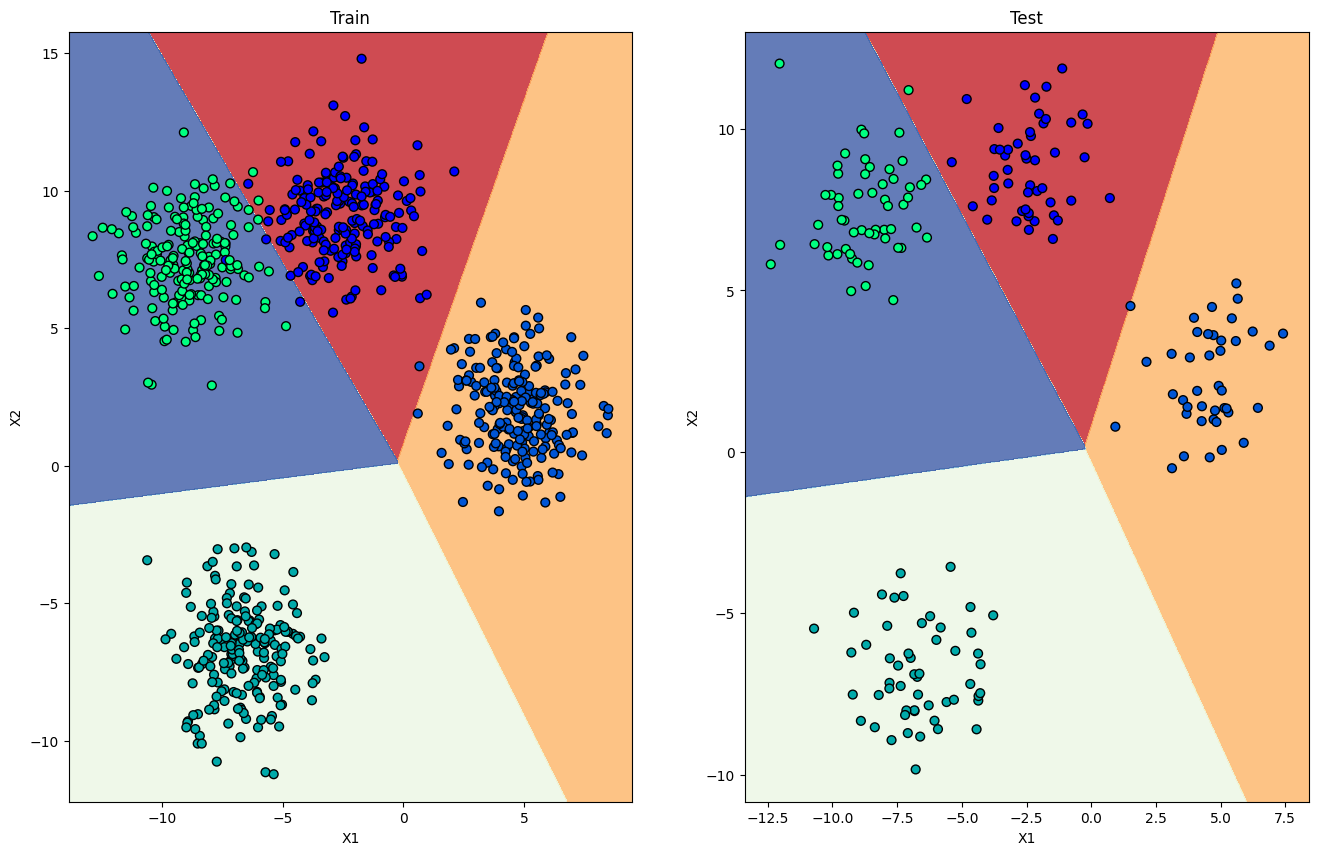

In [38]:
plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_blob_train, y_blob_train, model_1, "Train")
plt.subplot(1, 2, 2)
plot_decision_boundary(X_blob_test, y_blob_test, model_1, "Test")


## 3. A Question


Based on the above binary classification and multiclassification, we'll both use linear models for modelling.

Then if We'll use the [`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) method from Scikit-Learn to generate the dataset, you can run the following code for visualisation. Is the above model able to classify effectively?

You can try by model_0!

We will solve it in the neural network section of chapter 7!

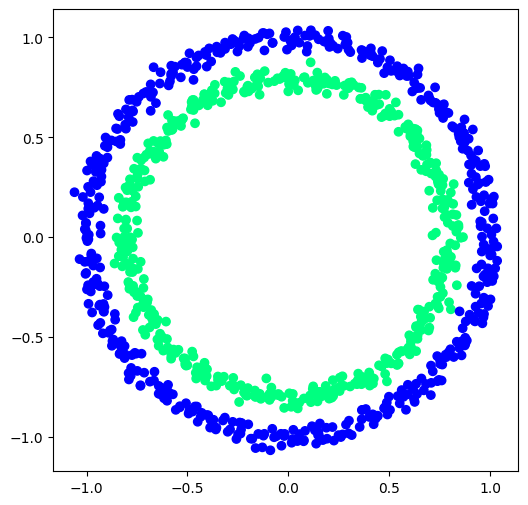

In [39]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

# Visualize with a plot
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6), dpi=100)
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.winter);

## Exercises

All of the exercises are focused on practicing the code in the sections above.

You should be able to complete them by referencing each section or by following the resource(s) linked.

All exercises should be completed using [device-agonistic code](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code).


1. Make a binary classification dataset with Scikit-Learn's [`make_classification()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function.
    * For consistency, the dataset should have 1000 samples 、 `n_clusters_per_class=1`、` n_features=2`、` n_informative=2`、`n_redundant=0`、`n_classes=2` and `random_state=54`.
    * Turn the data into PyTorch tensors. Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.
2. Build a model by subclassing `nn.Module` that incorporates logistic functions and is capable of fitting the data you created in 1.
3. Setup a binary classification compatible loss function and optimizer to use when training the model.
4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
    * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
    * Train the model for long enough for it to reach over 96% accuracy.
    * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.
5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

## Extra-curriculum

* Research when accuracy might be a poor metric to use (hint: read ["Beyond Accuracy" by by Will Koehrsen](https://willkoehrsen.github.io/statistics/learning/beyond-accuracy-precision-and-recall/) for ideas). **HINT**: If you were to build a system capable of detecting cancerous growth in x-ray images, would accuracy be your first metric?

* **Watch:** For an idea of what's happening within our neural networks and what they're doing to learn, watch [MIT's Introduction to Deep Learning video](https://youtu.be/7sB052Pz0sQ).